In [13]:
# from sklearn import svm,metrics
from sklearn.linear_model import LinearRegression   # 선형회귀
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [14]:
# numpy의 구조로 변환
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [15]:
# 1. 데이터 전처리
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight,random_state=42
)

In [16]:
# 알고리즘 구현을 위한 2차원 행렬 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

다항회귀

In [17]:
# 특성, 제곱을 자동으로 만들어주는 라이브러리
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# 특성, 제곱을 수동으로
# 1. 데이터 전처리: train, test세트 구성
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))


In [19]:
train_poly.shape

(42, 2)

In [20]:
# 2. 데이터 학습
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [21]:
predict = lr.predict([[50**2,50]])
predict

array([1573.98423528])

In [22]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


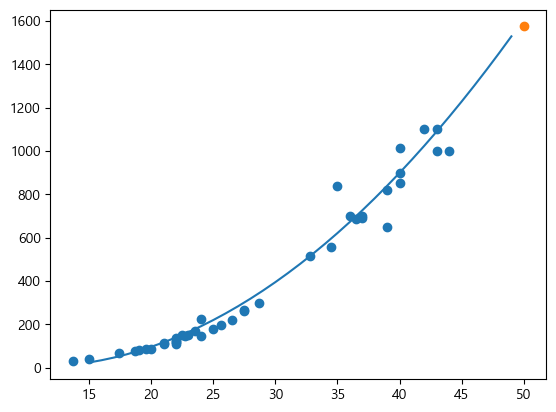

In [25]:
# 그래프 출력
# 선형회귀: 15,50의 값을 입력, 선 그리기
# 다항회귀: 직선을 여러번 그리기
plt.scatter(train_input,train_target)
x = np.arange(15,50)
# 2차방정식 y = ax**2 + bx + c(y절편: x가 0일 때)
plt.plot(x,((1.014*x)**2) -21.557*x + 116.050)# 기울기*x**2 + 기울기 * x + y절편
plt.scatter(50,1574)

In [24]:
# 예측률
print('train예측률: ',lr.score(train_poly,train_target))
print('test예측률: ',lr.score(test_poly,test_target))

train예측률:  0.9706807451768623
test예측률:  0.9775935108325122
